In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
df=pd.read_csv('./loan_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


- **credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- **purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- **int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- **installment**: The monthly installments owed by the borrower if the loan is funded.
- **log.annual.inc**: The natural log of the self-reported annual income of the borrower.
- **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- **fico**: The FICO credit score of the borrower. The higher the score the lower the risk and the more likerly creditors will lend money.
- **days.with.cr.line**: The number of days the borrower has had a credit line.
- **revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.
- **delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- **pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### EDA

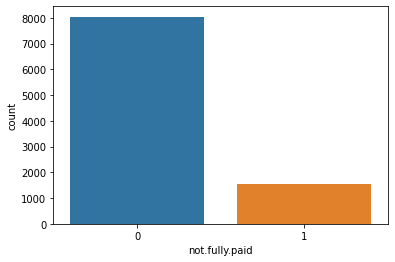

In [17]:
sns.countplot(x='not.fully.paid',data=df)

In [18]:
df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

From the chart above we can observe:

1. the data is unballanced
2. about ~83% of the loans are paid
3. about ~16% of the loans are not paid

since the data is inbalanced I will oversample this data

Visualise dataset grouped by load purpose.

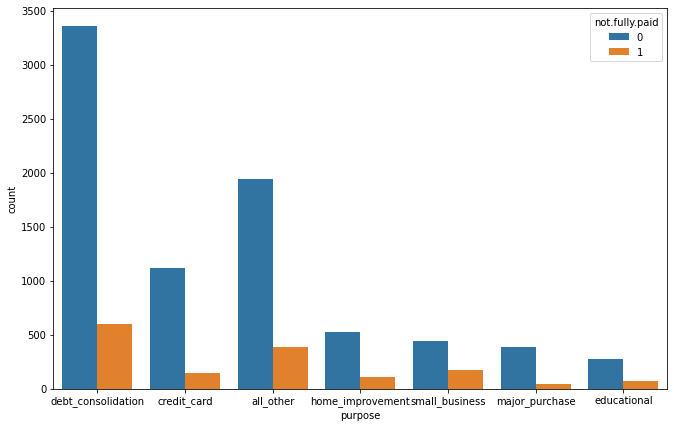

In [19]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)

From this chart we can conclude:

1. The highest purpose for not paid is debt_consolidation and then second is other
2. However the highest paid back is also debt_consolidation followd by all_other

Text(0.5, 0, 'FICO')

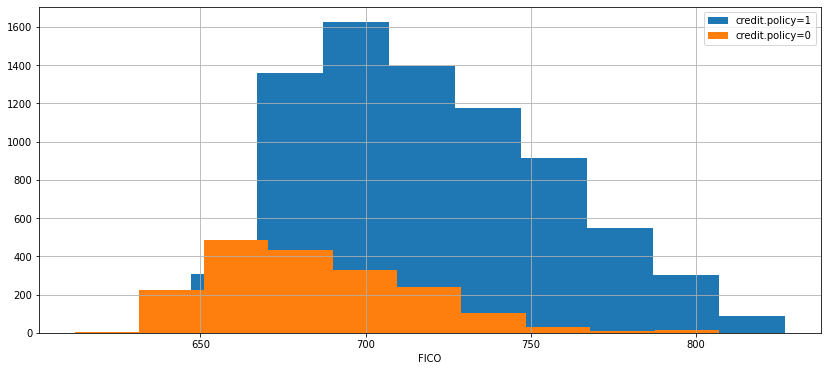

In [20]:
plt.figure(figsize=(14,6))
df[df['credit.policy']==1]['fico'].hist(label='credit.policy=1')
df[df['credit.policy']==0]['fico'].hist(label='credit.policy=0')
plt.legend()
plt.xlabel('FICO')

Blue rapresents in blue people with a positive (1) credit policy which means that they were meeting the criterias for the loan and the histogram represents their FICO score.

Orange rapresents the people with a negative (0) credit policy which menas that hey did not meet the criterias for the load and the histogram represents their FICO score.

Text(0.5, 0, 'FICO')

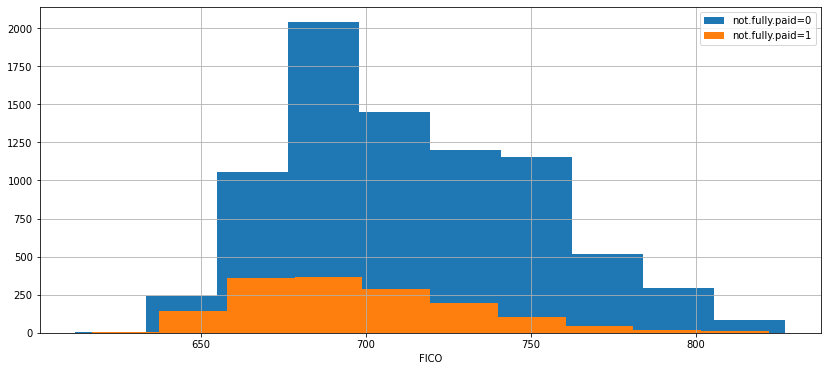

In [21]:
plt.figure(figsize=(14,6))
df[df['not.fully.paid']==0]['fico'].hist(label='not.fully.paid=0')
df[df['not.fully.paid']==1]['fico'].hist(label='not.fully.paid=1')
plt.legend()
plt.xlabel('FICO')

if we compare the two histograms we can notice that:

1. People with a high FICO score tend to pay their debt
2. People with a low FICO score tend to not pay their debt as expected
3. There are lots of people with a FICO score between 650 and 700 which paid their debt so maybe the FICO score was to conservative on those people

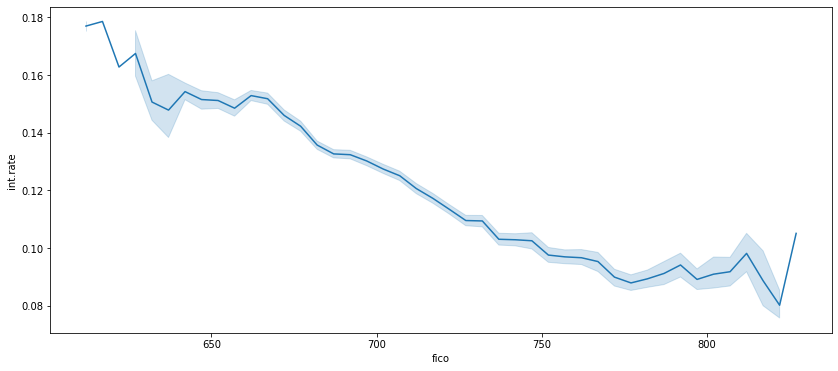

In [22]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x="fico", y="int.rate")

From this line chart we can notice that the higher the FICO the lower the interest rate

Text(0.5, 0, 'int.rate')

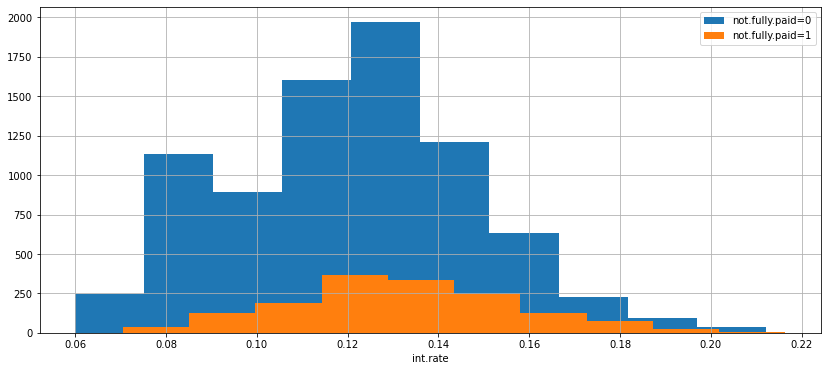

In [23]:
plt.figure(figsize=(14,6))
df[df['not.fully.paid']==0]['int.rate'].hist(label='not.fully.paid=0')
df[df['not.fully.paid']==1]['int.rate'].hist(label='not.fully.paid=1')
plt.legend()
plt.xlabel('int.rate')

The interest rate has a normal distribution for both paid and not paid loans which suggests that it does not majorly influence if the loan will be paid or not

### Transform categorical values into numerical values (discrete)

Before transforming our categorical feautres to discrete ones we need to balance our inbalanced data, if we don't do so then we'll need to transform the categorical values once again for the newlly added oversampled data.

In [24]:
#remember value counts returns a tuple because not fully paid can be 0 or 1
count_paid, count_not_paid=df['not.fully.paid'].value_counts()
print('paid', count_paid)
print('not paid', count_not_paid)

paid 8045
not paid 1533


In [25]:
df_paid=df[df['not.fully.paid']==0]
df_not_paid=df[df['not.fully.paid']==1]

In [26]:
df_not_paid_over=df_not_paid.sample(count_paid, replace=True)
df_test_over=pd.concat([df_paid,df_not_paid_over], axis=0)

print('Oversampling')
print(df_test_over['not.fully.paid'].value_counts())

Oversampling
0    8045
1    8045
Name: not.fully.paid, dtype: int64


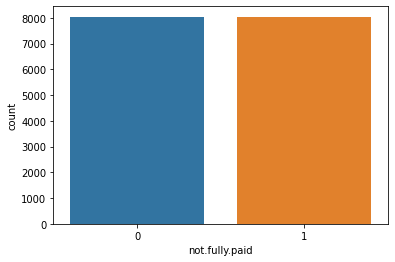

In [27]:
sns.countplot(x='not.fully.paid',data=df_test_over)


In [28]:
cols_feature=['purpose']
final_data=pd.get_dummies(df_test_over,columns=cols_feature,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 9203
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         1609

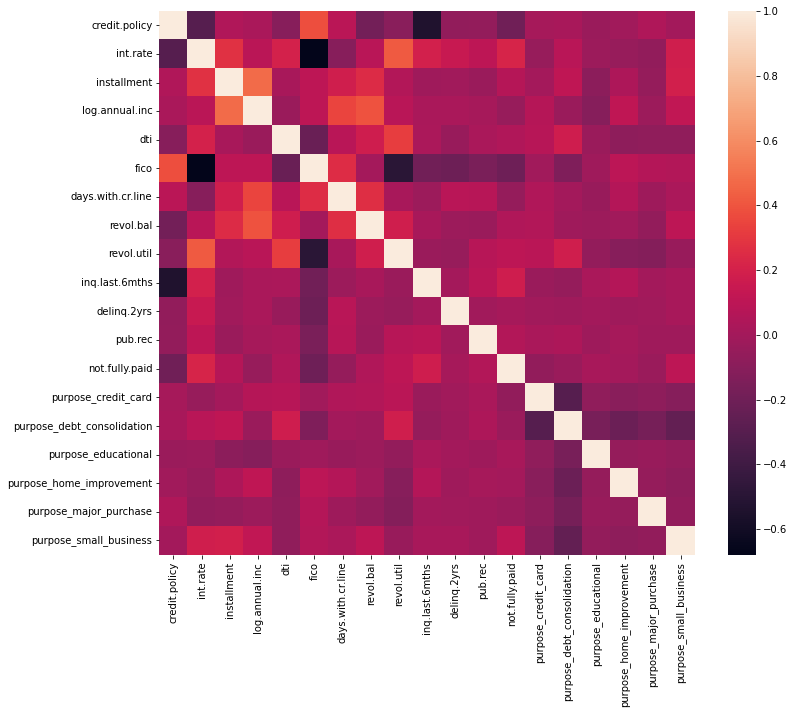

In [29]:
plt.figure(figsize=(12,10))
corr=final_data.corr()
sns.heatmap(data=corr)

###  Additional Feature Engineering

In this step I will remove features that have strong correlation, strong correlation.

In [30]:
predictors = final_data.drop(['not.fully.paid'], axis = 1) 
criterion = final_data["not.fully.paid"]

In [31]:
threshold = 0.65

def high_cor_function(df):
    cor = df.corr()
    corrm = np.corrcoef(df.transpose())
    corr = corrm - np.diagflat(corrm.diagonal())
    print("max corr:",corr.max(), ", min corr: ", corr.min())
    c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
    high_cor = abs(c1[c1.values!=1])
    thresh = threshold 
    display(high_cor[high_cor>thresh])

In [32]:
high_cor_function(predictors)

max corr: 0.47809644042828764 , min corr:  -0.6790513359731427


fico  int.rate    0.679051
dtype: float64

From the above calculations we can identify fico and int.rate as being highly correlated with a score of 0.68

In [33]:
final_data=final_data.drop(['int.rate'], axis=1)

### Modeling

In [34]:
from sklearn.model_selection import train_test_split

X=final_data.drop(['not.fully.paid'],axis=1)
y=final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

model=Sequential()
model.add(Dense(19, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['binary_accuracy'])


early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(X_train,y_train,epochs=200,batch_size=200,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/200
57/57 [==============================] - 4s 8ms/step - loss: 0.6881 - binary_accuracy: 0.5461 - val_loss: 0.6703 - val_binary_accuracy: 0.6138
Epoch 2/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6737 - binary_accuracy: 0.5834 - val_loss: 0.6609 - val_binary_accuracy: 0.6227
Epoch 3/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6663 - binary_accuracy: 0.5998 - val_loss: 0.6560 - val_binary_accuracy: 0.6194
Epoch 4/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6627 - binary_accuracy: 0.5982 - val_loss: 0.6545 - val_binary_accuracy: 0.6186
Epoch 5/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6601 - binary_accuracy: 0.6049 - val_loss: 0.6528 - val_binary_accuracy: 0.6198
Epoch 6/200
57/57 [==============================] - 0s 5ms/step - loss: 0.6604 - binary_accuracy: 0.6031 - val_loss: 0.6521 - val_binary_accuracy: 0.6207
Epoch 7/200
57/57 [==============================] - 0s 5ms/step - los

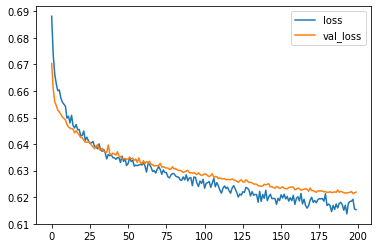

In [37]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot() 